## Multiclass classification on the Consumer complaints Dataset

**Dataset downloaded form: https://catalog.data.gov/dataset/consumer-complaint-database**

In [1]:
!wget https://files.consumerfinance.gov/ccdb/complaints.csv.zip -d complaints.zip

DEBUG output created by Wget 1.19.4 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name 'complaints.csv.zip' (UTF-8) -> 'complaints.csv.zip' (UTF-8)
--2021-12-11 15:34:43--  https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Resolving files.consumerfinance.gov (files.consumerfinance.gov)... 13.249.93.82, 13.249.93.54, 13.249.93.125, ...
Caching files.consumerfinance.gov => 13.249.93.82 13.249.93.54 13.249.93.125 13.249.93.124
Connecting to files.consumerfinance.gov (files.consumerfinance.gov)|13.249.93.82|:443... connected.
Created socket 5.
Releasing 0x0000557082a60ae0 (new refcount 1).
Initiating SSL handshake.
Handshake successful; connected socket 5 to SSL handle 0x0000557082a84000
certificate:
  subject: CN=files.consumerfinance.gov,O=Consumer Financial Protection Bureau,L=Washington,ST=District of Columbia,C=US
  issuer:  CN=Entrust Certification Authority - L1K,OU=(c) 2012 Entrust\\, Inc. - for authorized use only,OU=See ww

In [2]:
!unzip complaints.csv.zip

Archive:  complaints.csv.zip
  inflating: complaints.csv          


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from plotly.offline import iplot

In [4]:
# !find /c /v "complaints.csv"

### Since the number of data points is very large, only considering the required columns

In [5]:
df = pd.read_csv('complaints.csv', usecols = ['Product', 'Consumer complaint narrative'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374711 entries, 0 to 2374710
Data columns (total 2 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Product                       object
 1   Consumer complaint narrative  object
dtypes: object(2)
memory usage: 36.2+ MB


In [6]:
# df = df[['Product', 'Consumer complaint narrative']]

In [7]:
df.head()

,Product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",NaN
1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
2,"Credit reporting, credit repair services, or o...",NaN
3,Checking or savings account,NaN
4,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...


In [8]:
df1 = df.dropna(axis = 0)
df1.reset_index(drop=True)
# df1=df1.drop('index', axis = 1)

,Product,Consumer complaint narrative
0,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
1,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...
2,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
3,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
4,"Credit reporting, credit repair services, or o...",Two accounts are still on my credit history af...
...,...,...
829025,Credit card,"Automated calls from "" XXXX with Capital One '..."
829026,Debt collection,I have disputed my debts several times with no...
829027,Mortgage,My father died in XX/XX/XXXX. Left me his only...
829028,Credit reporting,cfbp i would Like to file a complaint on Exper...


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829030 entries, 1 to 2374709
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       829030 non-null  object
 1   Consumer complaint narrative  829030 non-null  object
dtypes: object(2)
memory usage: 19.0+ MB


In [10]:
df1.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    326828
Debt collection                                                                 160799
Mortgage                                                                         85766
Credit card or prepaid card                                                      62540
Checking or savings account                                                      38576
Credit reporting                                                                 31588
Student loan                                                                     29321
Money transfer, virtual currency, or money service                               19244
Credit card                                                                      18838
Vehicle loan or lease                                                            15521
Bank account or service                                                          14885
Payday loan, title loan, or personal loan  

**Some of the Products can be clubbed together like:**
- Consolidate “Credit reporting” into “Credit reporting, credit repair services, or other personal consumer reports”.
- Consolidate “Credit card” into “Credit card or prepaid card”.
- Consolidate “Payday loan” into “Payday loan, title loan, or personal loan”.
- Consolidate “Virtual currency” into “Money transfer, virtual currency, or money service”.  
“Other financial service” has very few number of complaints and it does not mean anything, so it is removed.

In [11]:
df1.loc[df1['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df1.loc[df1['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df1.loc[df1['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df1.loc[df1['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df1 = df1[df1.Product != 'Other financial service']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/li

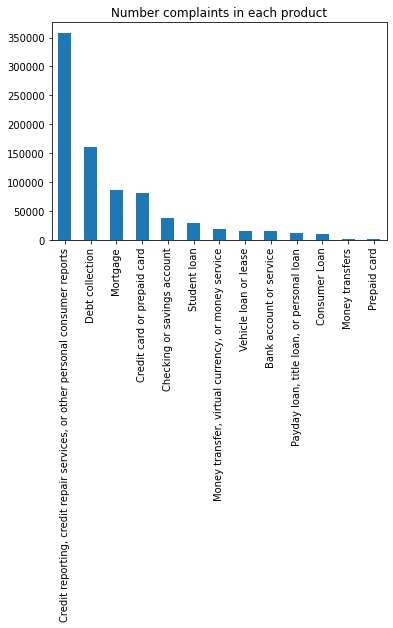

In [12]:
df1['Product'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                title='Number complaints in each product')

### Text exploration and cleaning

In [13]:
df1.head()

,Product,Consumer complaint narrative
1,Vehicle loan or lease,I contacted Ally on Friday XX/XX/XXXX after fa...
4,Credit card or prepaid card,On XX/XX/2019 my bill did not go through accou...
6,"Credit reporting, credit repair services, or o...",Hello This complaint is against the three cred...
7,"Credit reporting, credit repair services, or o...",I am a victim of Identity Theft & currently ha...
9,"Credit reporting, credit repair services, or o...",Two accounts are still on my credit history af...


In [14]:
def print_plot(index):
    example = df1.iloc[index].values
    if len(example) > 0:
        print(example[1])
        print('Product:', example[0])

In [15]:
print_plot(42)

Experian and XXXX are reporting me as 120 and 180 days past due XXXX XXXX  account that has a {$0.00} balance and {$0.00} past due. This is harming my credit score. I have disputed this directly with the two bureaus but the coding violation has not been corrected. It is impossible to be late on payments to an account that has a {$0.00} balance and {$0.00} past due amount. 

I have listed the account number for reference : XXXX
Product: Credit reporting, credit repair services, or other personal consumer reports


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
import re
from nltk.corpus import stopwords
#regular expressions for data cleaning
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [23]:
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '') #remove retracted info
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    text = re.sub('\d+', '', text)
    return text

In [24]:
df1['Consumer complaint narrative'] = df1['Consumer complaint narrative'].apply(clean_text)

In [25]:
print_plot(42)

eperian reporting   days past due account  balance  past due harming credit score disputed directly two bureaus coding violation corrected impossible late payments account  balance  past due amount listed account number reference
Product: Credit reporting, credit repair services, or other personal consumer reports


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 210740 unique tokens.


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df1['Consumer complaint narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (828738, 250)


In [28]:
Y = pd.get_dummies(df1['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (828738, 13)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(745864, 250) (745864, 13)
(82874, 250) (82874, 13)


In [30]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 13)                1313      
                                                                 
Total params: 5,081,713
Trainable params: 5,081,713
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
epochs = 5
batch_size = 1024

history = model.fit(X_train, Y_train, epochs=epochs,batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
656/656 [==============================] - 1124s 2s/step - loss: 0.7824 - accuracy: 0.7576 - val_loss: 0.6691 - val_accuracy: 0.7881
Epoch 2/5
656/656 [==============================] - 1145s 2s/step - loss: 0.6273 - accuracy: 0.8013 - val_loss: 0.5874 - val_accuracy: 0.8123
Epoch 3/5
656/656 [==============================] - 1150s 2s/step - loss: 0.5560 - accuracy: 0.8209 - val_loss: 0.5456 - val_accuracy: 0.8230
Epoch 4/5
656/656 [==============================] - 1106s 2s/step - loss: 0.5123 - accuracy: 0.8320 - val_loss: 0.5175 - val_accuracy: 0.8302
Epoch 5/5
656/656 [==============================] - 1105s 2s/step - loss: 0.4837 - accuracy: 0.8396 - val_loss: 0.5009 - val_accuracy: 0.8344


In [38]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2590/2590 [==============================] - 250s 97ms/step - loss: 0.5049 - accuracy: 0.8336
Test set
  Loss: 0.505
  Accuracy: 0.834


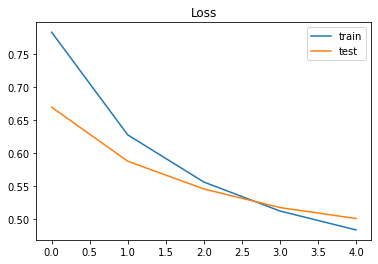

In [39]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

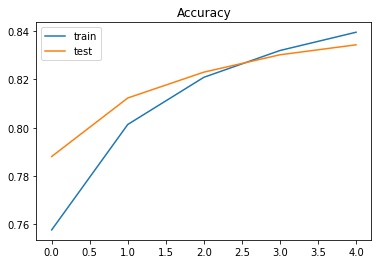

In [43]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [44]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[1.1177972e-03 5.9084711e-04 3.2392968e-04 5.5731051e-02 9.1647303e-01
  2.4779759e-02 9.3589013e-05 1.1725188e-06 3.5284809e-04 2.1023177e-04
  6.4868618e-06 4.5939141e-05 2.7322030e-04]] Student loan


In [46]:
model.save('consumer_complaints.h5')

In [51]:
import tensorflow as tf
new_model = tf.keras.models.load_model('consumer_complaints.h5')